In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resultados=pd.read_csv("https://raw.githubusercontent.com/jmcs1983/TFM-Sentimiento_COVID/main/resultados_analisis.csv",sep=';')

In [3]:
resultados

,comentario,id_publicacion,fecha_comentario,caracteres,>=100,>=75,>=50,periodo,pos_azure,neg_azure,neu_azure,sentiment_azure,MeaningCloud,score,magnitude
0,"Una vacuna sacada en tiempo record, a saber la...",1,2020-06-20,153,True,True,True,1,0.64,0.35,0.01,positive,P,0.4,0.4
1,Jose Howe Y para los que tenemos patologías pr...,1,2020-06-20,119,True,True,True,1,0.16,0.65,0.19,negative,NEU,0.1,0.3
2,"Puuf , con lo que paso con el otro material me...",1,2020-06-20,152,True,True,True,1,0.34,0.65,0.01,negative,P,0.0,0.0
3,"Angeles Martin Carmona si lo veo muy bien, com...",1,2020-06-20,182,True,True,True,1,0.17,0.83,0.00,negative,P,0.6,0.6
4,Jajajajaja no compraron material y los test de...,1,2020-06-20,184,True,True,True,1,0.50,0.48,0.02,mixed,P,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39203,Chicos de verdad creo que no leeis mas que el ...,80,2021-08-11,335,True,True,True,8,0.22,0.76,0.02,negative,N,-0.1,0.4
39204,Christofer Velazquez yo haré lo que me salga d...,80,2021-08-11,141,True,True,True,8,0.65,0.24,0.11,positive,NONE,0.1,0.4
39205,jajajajajajaja 60% vamoooos rebaño!!!!!! beeee...,80,2021-08-11,102,True,True,True,8,0.20,0.23,0.57,neutral,P,0.0,0.1
39206,Y si Galicia mejora sus fallos en la app del S...,80,2021-08-11,134,True,True,True,8,0.03,0.84,0.13,negative,NEU,-0.1,0.8


In [ ]:
#RESULTADOS DETALLADOS MEANING CLOUD
resultados_Meaning = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','TOTAL'],index=['P+','P','NEU','N','N+','NONE','Vacio','TOTAL'])

In [ ]:
#RELLENO DEL DATAFRAME MEANING CLOUD

for i in range(1,9):
  for j in ['P+','P','NEU','N','N+','NONE']:
    contador = resultados.apply(lambda x: True if x[7] == i and x[12] ==j else False , axis=1)
    filas = len(contador[contador== True].index)
    resultados_Meaning.loc[j,str(i)]=filas
  
  contadorvac=resultados.apply(lambda x: True if x[7] == i and x[12]!=x[12] else False , axis=1)
  filasvac = len(contadorvac[contadorvac== True].index)
  resultados_Meaning.loc['Vacio',str(i)]=filasvac
  resultados_Meaning.loc['TOTAL',str(i)]=resultados_Meaning[str(i)].sum()

resultados_Meaning['TOTAL']=resultados_Meaning.sum(axis=1)

In [ ]:
resultados['MeaningCloud'].value_counts()

N       14721
P       12175
NEU      7091
N+       2255
NONE     1784
P+       1181
Name: MeaningCloud, dtype: int64

In [ ]:
resultados_Meaning

,1,2,3,4,5,6,7,8,TOTAL
P+,148,151,126,131,139,181,171,134,1181.0
P,1768,1737,1378,1272,1238,1656,1781,1345,12175.0
NEU,988,979,765,768,723,1017,981,870,7091.0
N,2018,1920,1717,1582,1476,2097,2138,1773,14721.0
N+,286,249,244,274,275,294,354,279,2255.0
NONE,163,183,225,192,197,315,330,179,1784.0
Vacio,0,0,0,0,1,0,0,0,1.0
TOTAL,5371,5219,4455,4219,4049,5560,5755,4580,39208.0


In [ ]:
#RESULTADOS DETALLADOS TEXT ANALYTICS
resultados_azure = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','TOTAL'],index=['positive','neutral','mixed','negative','Vacio','TOTAL'])

In [ ]:
#RELLENO DEL DATAFRAME TEXT ANALYTICS

for i in range(1,9):
  for j in ['positive','neutral','mixed','negative']:
    contador = resultados.apply(lambda x: True if x[7] == i and x[11] ==j else False , axis=1)
    filas = len(contador[contador== True].index)
    resultados_azure.loc[j,str(i)]=filas
  
  contadorvac=resultados.apply(lambda x: True if x[7] == i and x[11]!=x[11] else False , axis=1)
  filasvac = len(contadorvac[contadorvac== True].index)
  resultados_azure.loc['Vacio',str(i)]=filasvac
  resultados_azure.loc['TOTAL',str(i)]=resultados_azure[str(i)].sum()

resultados_azure['TOTAL']=resultados_azure.sum(axis=1)

In [ ]:
resultados['sentiment_azure'].value_counts()

negative    23907
mixed        6837
positive     5378
neutral      3023
Name: sentiment_azure, dtype: int64

In [ ]:
resultados_azure

,1,2,3,4,5,6,7,8,TOTAL
positive,742,718,591,606,607,763,744,607,5378.0
neutral,350,372,379,320,285,522,498,297,3023.0
mixed,1013,989,792,673,690,904,976,800,6837.0
negative,3262,3136,2679,2620,2461,3371,3508,2870,23907.0
Vacio,4,4,14,0,6,0,29,6,63.0
TOTAL,5371,5219,4455,4219,4049,5560,5755,4580,39208.0


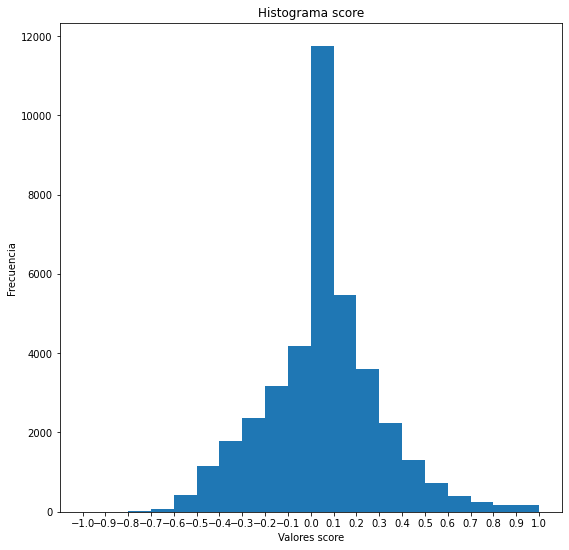

In [ ]:
#HISTOGRAMAS SCORE Y MAGNITUDE
import matplotlib.pyplot as plt
import numpy as np

intervalos1=np.arange(-1,1.1,0.1)
plt.rcParams["figure.figsize"] = (9, 9)

plt.hist(x=resultados['score'], bins=intervalos1)
plt.title('Histograma score')
plt.xlabel('Valores score')
plt.ylabel('Frecuencia')
plt.xticks(intervalos1)

plt.show()



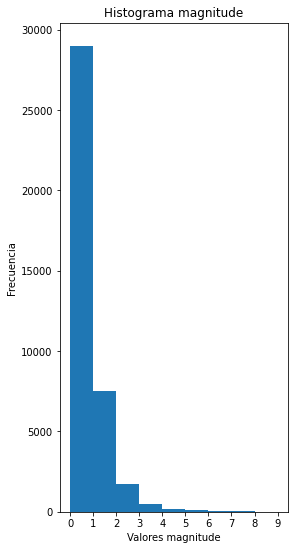

In [ ]:
intervalos2=range(0,10)
plt.subplot(1, 2, 2)
plt.hist(x=resultados['magnitude'], bins=intervalos2)
plt.title('Histograma magnitude')
plt.xlabel('Valores magnitude')
plt.ylabel('Frecuencia')
plt.xticks(intervalos2)


plt.show()

In [ ]:
#CONVERSION RESULTADOS NATURAL LANGUAGE
resultados['NaturalLan']=""

In [ ]:
for i in resultados.index:
  if resultados.loc[i,'score'] >= 0.1:
    resultados.loc[i,'NaturalLan']='positivo'
  elif resultados.loc[i,'score'] <= -0.1:
    resultados.loc[i,'NaturalLan']='negativo'
  elif resultados.loc[i,'magnitude'] <= 0.8: 
    resultados.loc[i,'NaturalLan']='neutral'
  else:
    resultados.loc[i,'NaturalLan']='mixto'

In [ ]:
resultados

,comentario,id_publicacion,fecha_comentario,caracteres,>=100,>=75,>=50,periodo,pos_azure,neg_azure,neu_azure,sentiment_azure,MeaningCloud,score,magnitude,NaturalLan
0,"Una vacuna sacada en tiempo record, a saber la...",1,2020-06-20,153,True,True,True,1,0.64,0.35,0.01,positive,P,0.4,0.4,positivo
1,Jose Howe Y para los que tenemos patologías pr...,1,2020-06-20,119,True,True,True,1,0.16,0.65,0.19,negative,NEU,0.1,0.3,positivo
2,"Puuf , con lo que paso con el otro material me...",1,2020-06-20,152,True,True,True,1,0.34,0.65,0.01,negative,P,0.0,0.0,neutral
3,"Angeles Martin Carmona si lo veo muy bien, com...",1,2020-06-20,182,True,True,True,1,0.17,0.83,0.00,negative,P,0.6,0.6,positivo
4,Jajajajaja no compraron material y los test de...,1,2020-06-20,184,True,True,True,1,0.50,0.48,0.02,mixed,P,0.0,0.5,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39203,Chicos de verdad creo que no leeis mas que el ...,80,2021-08-11,335,True,True,True,8,0.22,0.76,0.02,negative,N,-0.1,0.4,negativo
39204,Christofer Velazquez yo haré lo que me salga d...,80,2021-08-11,141,True,True,True,8,0.65,0.24,0.11,positive,NONE,0.1,0.4,positivo
39205,jajajajajajaja 60% vamoooos rebaño!!!!!! beeee...,80,2021-08-11,102,True,True,True,8,0.20,0.23,0.57,neutral,P,0.0,0.1,neutral
39206,Y si Galicia mejora sus fallos en la app del S...,80,2021-08-11,134,True,True,True,8,0.03,0.84,0.13,negative,NEU,-0.1,0.8,negativo


In [ ]:
#RESULTADOS DETALLADOS NATURAL LANGUAGE
resultados_google = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','TOTAL'],index=['positivo','neutral','mixto','negativo','Vacio','TOTAL'])

In [ ]:
#RELLENO DEL DATAFRAME NATURAL LANGUAGE

for i in range(1,9):
  for j in ['positivo','neutral','mixto','negativo']:
    contador = resultados.apply(lambda x: True if x[7] == i and x[15] ==j else False , axis=1)
    filas = len(contador[contador== True].index)
    resultados_google.loc[j,str(i)]=filas
  
  contadorvac=resultados.apply(lambda x: True if x[7] == i and x[15]!=x[15] else False , axis=1)
  filasvac = len(contadorvac[contadorvac== True].index)
  resultados_google.loc['Vacio',str(i)]=filasvac
  resultados_google.loc['TOTAL',str(i)]=resultados_google[str(i)].sum()

resultados_google['TOTAL']=resultados_google.sum(axis=1)

In [ ]:
resultados_google

,1,2,3,4,5,6,7,8,TOTAL
positivo,2081,1873,1697,1486,1484,1937,2157,1580,14295.0
neutral,1072,1073,928,860,848,1222,1253,998,8254.0
mixto,456,515,449,351,345,442,485,451,3494.0
negativo,1762,1758,1381,1522,1372,1959,1860,1551,13165.0
Vacio,0,0,0,0,0,0,0,0,0.0
TOTAL,5371,5219,4455,4219,4049,5560,5755,4580,39208.0


In [ ]:
#CREACION DE UN DATAFRAME PARA EXPORTAR PARA TRABAJAR EN TABLEAU
resultados_graficos=pd.DataFrame()
resultados_graficos[['periodo','sentiment_azure','MeaningCloud','NaturalLan']]=resultados[['periodo','sentiment_azure','MeaningCloud','NaturalLan']]
resultados_graficos

,periodo,sentiment_azure,MeaningCloud,NaturalLan
0,1,positive,P,positivo
1,1,negative,NEU,positivo
2,1,negative,P,neutral
3,1,negative,P,positivo
4,1,mixed,P,neutral
...,...,...,...,...
39203,8,negative,N,negativo
39204,8,positive,NONE,positivo
39205,8,neutral,P,neutral
39206,8,negative,NEU,negativo


In [ ]:
from google.colab import files
with open('resultados_graficos.csv', 'w') as f:
      resultados_graficos.to_csv(f,index = False,sep=';',encoding='utf-8')
files.download('resultados_graficos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##CALCULO FRECUENCIA PALABRAS

In [4]:
texto_total=resultados.loc[0,"comentario"]

In [5]:
for i in range(1,len(resultados.index)):
  texto_total = texto_total+" "+resultados.loc[i,"comentario"]

In [7]:
lista_texto = texto_total.split(" ")

In [33]:
palabras=[]
texto_filtro=""
for palabra in lista_texto:
    if (len(palabra)>5):
        palabras.append(palabra)
        texto_filtro=texto_filtro+palabra+" "

In [34]:
word_count={}

In [35]:
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
word_count

{'vacuna': [8925],
 'sacada': [14],
 'tiempo': [1399],
 'record,': [6],
 'pruebas': [429],
 'ensayos': [229],
 'habrán': [88],
 'saltado,': [2],
 'bueno,': [118],
 'ustedes,': [44],
 'conejillos': [127],
 'indias': [93],
 'farmaceuticas': [64],
 'forren': [10],
 'tenemos': [1305],
 'patologías': [257],
 'previas': [32],
 'GRAVES,': [1],
 'mayores': [877],
 'muramos...': [1],
 'hubiesen': [47],
 'vacunado': [1186],
 'pequeños,': [9],
 'estarías': [15],
 'opinando.': [1],
 'material': [143],
 'seguir': [861],
 'españoles': [360],
 'fiarse': [17],
 'gobierno': [1956],
 'asesino': [21],
 'seguro': [627],
 'quieren': [1342],
 'ahorrarse': [19],
 '20.000': [33],
 'pensiones': [72],
 'Angeles': [152],
 'Martin': [364],
 'Carmona': [64],
 'quieres': [700],
 'vacunas': [5712],
 'brazo,': [41],
 'recuperado': [5],
 'cuando': [3754],
 'alejado': [10],
 'medicina': [235],
 'moderna,': [26],
 'corrupta': [13],
 'poder,': [28],
 'dejadnos': [6],
 'Jajajajaja': [32],
 'compraron': [41],
 'defectuosos

In [36]:
frecuencias = pd.DataFrame.from_dict(word_count).transpose()
frecuencias.columns=["freq"]
frecuencias.sort_values(["freq"], ascending=False, inplace=True)
frecuencias.head(10)

,freq
vacuna,8925
vacunas,5712
porque,5308
personas,3781
cuando,3754
tienen,2635
efectos,2304
también,2240
gobierno,1956
vacunar,1785


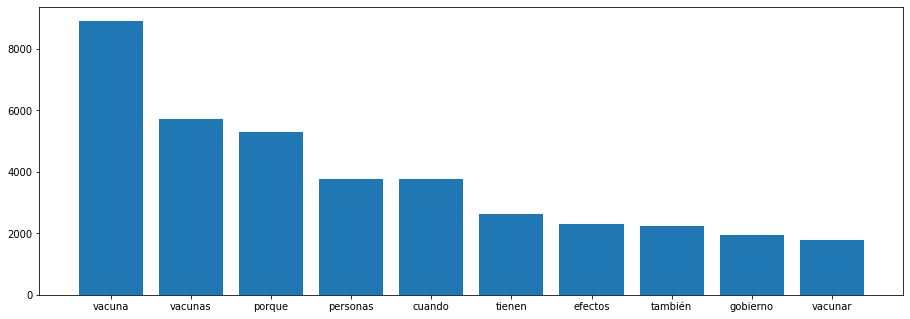

In [37]:
fig=plt.figure()
f=fig.add_axes([0,0,2,1])
f.bar(frecuencias.iloc[:10,:].index, frecuencias.iloc[:10,0].values)
plt.show()

In [38]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [39]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=1000, min_font_size=5).generate(texto_filtro)

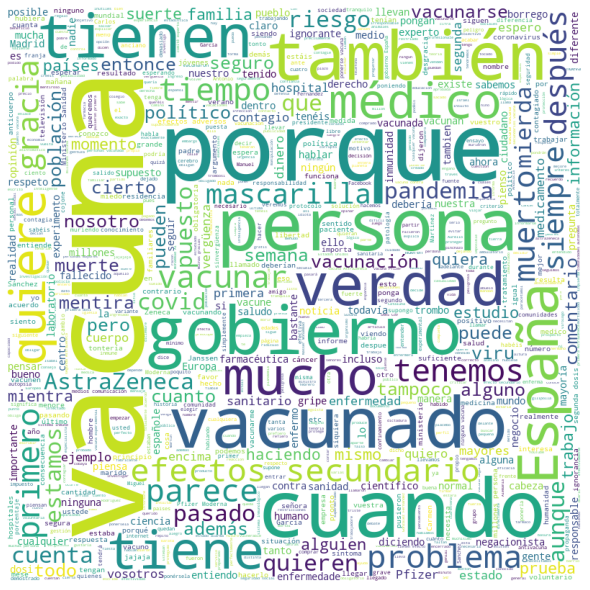

In [40]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()